### Import libraries

In [221]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve,auc,roc_curve,confusion_matrix,classification_report,precision_score,recall_score,f1_score,accuracy_score
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Read data

In [2]:
cc_data = pd.read_csv('/Users/nitesh.chandnani/Desktop/Miscellaneous/Datasets/creditcard.csv')

### Check class distribution

In [50]:
cc_data.groupby('Class').Time.count()

Class
0    284315
1       492
Name: Time, dtype: int64

### Split into train & test set

In [119]:
ip = cc_data.loc[:,'Time':'Amount']
op = cc_data.loc[:,'Class']
x_train,x_test,y_train,y_test = train_test_split(ip,op,test_size=0.2,random_state=1)

### Oversample the data to have balanced class distribution

In [228]:
sm = SMOTE(random_state=1,ratio=1.0)
x_train_os,y_train_os = sm.fit_sample(x_train,y_train)

### Training RF on original data

In [231]:
clf_o = RandomForestClassifier(max_depth = 30, n_estimators = 100, random_state=1)
clf_o.fit(x_train,y_train)
print 'Accuracy score : ',clf_o.score(x_test,y_test)

Accuracy score :  0.9995611109160493


In [232]:
fpr,tpr,thresholds = roc_curve(y_test,clf_o.predict_proba(x_test)[:,1])
auc_roc_score_o = auc(fpr,tpr)
precision,recall,thresholds = precision_recall_curve(y_test,clf_o.predict_proba(x_test)[:,1])
auc_pr_score_o = auc(recall,precision)
print 'AUC ROC score : ',auc_roc_score_o
print 'AUC PR score : ',auc_pr_score_o

for i in range(1,11,1):
    print '\nThreshold = ',float(i)/10
    accuracy_sc_o = accuracy_score(y_test,clf_o.predict_proba(x_test)[:,1]>float(i)/10)
    precision_sc_o = precision_score(y_test,clf_o.predict_proba(x_test)[:,1]>float(i)/10)
    recall_sc_o = recall_score(y_test,clf_o.predict_proba(x_test)[:,1]>float(i)/10)
    confusion_sc_o = confusion_matrix(y_test,clf_o.predict_proba(x_test)[:,1]>float(i)/10)
    f1_sc_o = f1_score(y_test,clf_o.predict_proba(x_test)[:,1]>float(i)/10)
    print 'Accuracy : ',accuracy_sc_o
    print 'Precision : ',precision_sc_o
    print 'Recall : ',recall_sc_o
    print 'F1 score : ',f1_sc_o
    print 'Confusion Matrix :\n',confusion_sc_o

AUC ROC score :  0.9404668435013263
AUC PR score :  0.796455400846677

Threshold =  0.1
Accuracy :  0.9991397773954567
Precision :  0.69
Recall :  0.7931034482758621
F1 score :  0.7379679144385026
Confusion Matrix :
[[56844    31]
 [   18    69]]

Threshold =  0.2
Accuracy :  0.9993328885923949
Precision :  0.7816091954022989
Recall :  0.7816091954022989
F1 score :  0.781609195402299
Confusion Matrix :
[[56856    19]
 [   19    68]]

Threshold =  0.3
Accuracy :  0.9994382219725431
Precision :  0.8395061728395061
Recall :  0.7816091954022989
F1 score :  0.8095238095238094
Confusion Matrix :
[[56862    13]
 [   19    68]]

Threshold =  0.4
Accuracy :  0.9995611109160493
Precision :  0.9305555555555556
Recall :  0.7701149425287356
F1 score :  0.8427672955974842
Confusion Matrix :
[[56870     5]
 [   20    67]]

Threshold =  0.5
Accuracy :  0.9995611109160493
Precision :  0.9305555555555556
Recall :  0.7701149425287356
F1 score :  0.8427672955974842
Confusion Matrix :
[[56870     5]
 [   2

### Training RF on oversampled data

In [233]:
clf_os = RandomForestClassifier(max_depth = 40, n_estimators = 1000, random_state=1)
clf_os.fit(x_train_os,y_train_os)
print 'Accuracy score : ',clf_os.score(x_test,y_test)

Accuracy score :  0.9995084442259752


In [235]:
fpr,tpr,thresholds = roc_curve(y_test,clf_os.predict_proba(x_test)[:,1])
auc_roc_score_os = auc(fpr,tpr)
precision,recall,thresholds = precision_recall_curve(y_test,clf_os.predict_proba(x_test)[:,1])
auc_pr_score_os = auc(recall,precision)
print 'AUC ROC score : ',auc_roc_score_os
print 'AUC PR score : ',auc_pr_score_os

for i in range(1,11,1):
    print '\nThreshold = ',float(i)/10
    accuracy_sc_os = accuracy_score(y_test,clf_os.predict_proba(x_test)[:,1]>float(i)/10)
    precision_sc_os = precision_score(y_test,clf_os.predict_proba(x_test)[:,1]>float(i)/10)
    recall_sc_os = recall_score(y_test,clf_os.predict_proba(x_test)[:,1]>float(i)/10)
    confusion_sc_os = confusion_matrix(y_test,clf_os.predict_proba(x_test)[:,1]>float(i)/10)
    f1_sc_os = f1_score(y_test,clf_os.predict_proba(x_test)[:,1]>float(i)/10)
    print 'Accuracy : ',accuracy_sc_os
    print 'Precision : ',precision_sc_os
    print 'Recall : ',recall_sc_os
    print 'F1 score : ',f1_sc_os
    print 'Confusion Matrix :\n',confusion_sc_os

AUC ROC score :  0.9783766578249337
AUC PR score :  0.8051225626498856

Threshold =  0.1
Accuracy :  0.9970857764825674
Precision :  0.32599118942731276
Recall :  0.8505747126436781
F1 score :  0.4713375796178344
Confusion Matrix :
[[56722   153]
 [   13    74]]

Threshold =  0.2
Accuracy :  0.9989817773252344
Precision :  0.6283185840707964
Recall :  0.8160919540229885
F1 score :  0.71
Confusion Matrix :
[[56833    42]
 [   16    71]]

Threshold =  0.3
Accuracy :  0.9992626663389628
Precision :  0.7368421052631579
Recall :  0.8045977011494253
F1 score :  0.7692307692307692
Confusion Matrix :
[[56850    25]
 [   17    70]]

Threshold =  0.4
Accuracy :  0.9994382219725431
Precision :  0.8313253012048193
Recall :  0.7931034482758621
F1 score :  0.8117647058823529
Confusion Matrix :
[[56861    14]
 [   18    69]]

Threshold =  0.5
Accuracy :  0.9995084442259752
Precision :  0.8734177215189873
Recall :  0.7931034482758621
F1 score :  0.8313253012048193
Confusion Matrix :
[[56865    10]
 [ 

#### Feature importance with RF

Feature ranking:
1. feature 14 (0.229998)
2. feature 10 (0.112853)
3. feature 4 (0.109986)
4. feature 17 (0.108779)
5. feature 12 (0.089965)
6. feature 11 (0.081277)
7. feature 16 (0.059308)
8. feature 3 (0.042708)
9. feature 2 (0.023811)
10. feature 7 (0.023686)
11. feature 1 (0.015210)
12. feature 9 (0.014900)
13. feature 21 (0.009380)
14. feature 18 (0.009169)
15. feature 6 (0.008434)
16. feature 0 (0.007552)
17. feature 28 (0.005454)
18. feature 8 (0.005387)
19. feature 13 (0.004272)
20. feature 29 (0.004222)
21. feature 20 (0.004059)
22. feature 19 (0.003940)
23. feature 26 (0.003820)
24. feature 15 (0.003620)
25. feature 5 (0.003437)
26. feature 22 (0.003312)
27. feature 24 (0.003185)
28. feature 25 (0.002874)
29. feature 23 (0.002701)
30. feature 27 (0.002701)


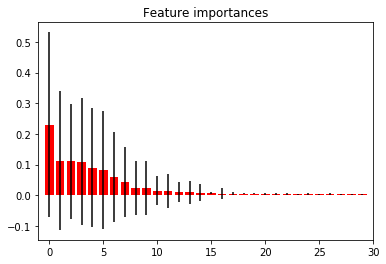

In [134]:
imp = clf_os.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_os.estimators_],
             axis=0)
indices = np.argsort(imp)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(x_train_os.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], imp[indices[f]]))
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train_os.shape[1]), imp[indices],
       color="r", yerr=std[indices], align="center")
plt.xlim([-1, x_train_os.shape[1]])
plt.show()

### Training RF with lesser class 0 data

In [227]:
cc_data_ss_0 = cc_data[cc_data.Class == 0].sample(10000,random_state=1)   #randomly select data with non fraud transaction
cc_data_ss_1 = cc_data[cc_data.Class == 1]

cc_data_ss = pd.DataFrame()
cc_data_ss = cc_data_ss.append(cc_data_ss_0)
cc_data_ss = cc_data_ss.append(cc_data_ss_1)

In [191]:
ip_ss = cc_data_ss.loc[:,'Time':'Amount']
op_ss = cc_data_ss.loc[:,'Class']
x_train_ss,x_test_ss,y_train_ss,y_test_ss = train_test_split(ip_ss,op_ss,test_size=0.2,random_state=1)

#### With oversampling data

In [192]:
sm = SMOTE(random_state=1,ratio=1.0)
x_train_os_ss,y_train_os_ss = sm.fit_sample(x_train_ss,y_train_ss)

In [246]:
clf_os_ss = RandomForestClassifier(n_estimators = 1000,random_state=1)
clf_os_ss.fit(x_train_os_ss,y_train_os_ss)
print 'Accuracy score : ',clf_os_ss.score(x_test_ss,y_test_ss)

Accuracy score :  0.993806574559314


In [247]:
fpr,tpr,thresholds = roc_curve(y_test_ss,clf_os_ss.predict_proba(x_test_ss)[:,1])
auc_roc_score_os_ss = auc(fpr,tpr)
precision,recall,thresholds = precision_recall_curve(y_test_ss,clf_os_ss.predict_proba(x_test_ss)[:,1])
auc_pr_score_os_ss = auc(recall,precision)
print 'AUC ROC score : ',auc_roc_score_os_ss
print 'AUC PR score : ',auc_pr_score_os_ss

for i in range(1,11,1):
    print '\nThreshold = ',float(i)/10
    accuracy_sc_os_ss = accuracy_score(y_test_ss,clf_os_ss.predict_proba(x_test_ss)[:,1]>float(i)/10)
    precision_sc_os_ss = precision_score(y_test_ss,clf_os_ss.predict_proba(x_test_ss)[:,1]>float(i)/10)
    recall_sc_os_ss = recall_score(y_test_ss,clf_os_ss.predict_proba(x_test_ss)[:,1]>float(i)/10)
    confusion_sc_os_ss = confusion_matrix(y_test_ss,clf_os_ss.predict_proba(x_test_ss)[:,1]>float(i)/10)
    f1_sc_os_ss = f1_score(y_test_ss,clf_os_ss.predict_proba(x_test_ss)[:,1]>float(i)/10)
    print 'Accuracy : ',accuracy_sc_os_ss
    print 'Precision : ',precision_sc_os_ss
    print 'Recall : ',recall_sc_os_ss
    print 'F1 score : ',f1_sc_os_ss
    print 'Confusion Matrix :\n',confusion_sc_os_ss

AUC ROC score :  0.9878668455475431
AUC PR score :  0.9521649211097444

Threshold =  0.1
Accuracy :  0.9209147212958552
Precision :  0.3441295546558704
Recall :  0.9550561797752809
F1 score :  0.5059523809523809
Confusion Matrix :
[[1848  162]
 [   4   85]]

Threshold =  0.2
Accuracy :  0.9795140543115769
Precision :  0.6885245901639344
Recall :  0.9438202247191011
F1 score :  0.7962085308056872
Confusion Matrix :
[[1972   38]
 [   5   84]]

Threshold =  0.3
Accuracy :  0.9904716531681753
Precision :  0.8556701030927835
Recall :  0.9325842696629213
F1 score :  0.8924731182795699
Confusion Matrix :
[[1996   14]
 [   6   83]]

Threshold =  0.4
Accuracy :  0.993806574559314
Precision :  0.9318181818181818
Recall :  0.9213483146067416
F1 score :  0.9265536723163842
Confusion Matrix :
[[2004    6]
 [   7   82]]

Threshold =  0.5
Accuracy :  0.993806574559314
Precision :  0.9634146341463414
Recall :  0.8876404494382022
F1 score :  0.9239766081871345
Confusion Matrix :
[[2007    3]
 [  10   7

#### Without oversampling data

In [197]:
clf_ss = RandomForestClassifier(max_depth = 40, n_estimators = 1000, random_state=1)
clf_ss.fit(x_train_ss,y_train_ss)
print 'Accuracy score : ',clf_ss.score(x_test_ss,y_test_ss)

Accuracy score :  0.9942829919009052


In [212]:
fpr,tpr,thresholds = roc_curve(y_test_ss,clf_ss.predict_proba(x_test_ss)[:,1])
auc_roc_score_ss = auc(fpr,tpr)
precision,recall,thresholds = precision_recall_curve(y_test_ss,clf_ss.predict_proba(x_test_ss)[:,1])
auc_pr_score_ss = auc(recall,precision)
print 'AUC ROC score : ',auc_roc_score_ss
print 'AUC PR score : ',auc_pr_score_ss

for i in range(1,11,1):
    print '\nThreshold = ',float(i)/10
    precision_sc_ss = precision_score(y_test_ss,clf_ss.predict_proba(x_test_ss)[:,1]>float(i)/10)
    recall_sc_ss = recall_score(y_test_ss,clf_ss.predict_proba(x_test_ss)[:,1]>float(i)/10)
    confusion_sc_ss = confusion_matrix(y_test_ss,clf_ss.predict_proba(x_test_ss)[:,1]>float(i)/10)
    f1_sc_ss = f1_score(y_test_ss,clf_ss.predict_proba(x_test_ss)[:,1]>float(i)/10)
    print 'Precision : ',precision_sc_ss
    print 'Recall : ',recall_sc_ss
    print 'F1 score :\n',f1_sc_ss
    print 'Confusion Matrix :\n',confusion_sc_ss

AUC ROC score :  0.9848957459891553
AUC PR score :  0.9388204295813627

Threshold =  0.1
Precision :  0.7410714285714286
Recall :  0.9325842696629213
F1 score :
0.8258706467661691
Confusion Matrix :
[[1981   29]
 [   6   83]]

Threshold =  0.2
Precision :  0.9294117647058824
Recall :  0.8876404494382022
F1 score :
0.9080459770114941
Confusion Matrix :
[[2004    6]
 [  10   79]]

Threshold =  0.3
Precision :  0.9873417721518988
Recall :  0.8764044943820225
F1 score :
0.9285714285714286
Confusion Matrix :
[[2009    1]
 [  11   78]]

Threshold =  0.4
Precision :  0.9871794871794872
Recall :  0.8651685393258427
F1 score :
0.9221556886227544
Confusion Matrix :
[[2009    1]
 [  12   77]]

Threshold =  0.5
Precision :  1.0
Recall :  0.8651685393258427
F1 score :
0.927710843373494
Confusion Matrix :
[[2010    0]
 [  12   77]]

Threshold =  0.6
Precision :  1.0
Recall :  0.8651685393258427
F1 score :
0.927710843373494
Confusion Matrix :
[[2010    0]
 [  12   77]]

Threshold =  0.7
Precision :  